### In this project we will do classification of Hand-Written digits(MNIST). For the dataset we will use `Keras` API to download dataset.Our main objective is to classify hand-written digits(0-9).

#### Before we jump into programming work lets import some dependencies that we will be requiring.Below few libraries has been imported 

In [1]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import keras 
import numpy as np
from sklearn.metrics import confusion_matrix
import math

Using TensorFlow backend.


#### Here we will download the `mnist` dataset from `Keras` API.You can click [here](https://keras.io/datasets/) for the dataset

In [2]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
#Lets print the shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


The dataset consist of 60000 training images and 10000 testing images

#### Lets print any number and its image randomly from train and test set to validate the dataset. You can try with any random number 

3


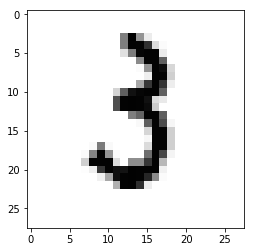

In [4]:
random_index = 1234
print(y_train[random_index])
plt.imshow(x_train[random_index],cmap='Greys')

Above we can see that `y_train` have number `3` and image also showing the number `3` with random number.

#### As the dataset consist of 3dim array so we need to normalize the dataset into 4dim array for neural network.

In [5]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape = (28,28,1)

In [6]:
#float values
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
#normalizing the RGB value
x_train /= 255
x_test /= 255

#### Now agian check the shape of the dataset 

In [8]:
print('Shape of Training Set',x_train.shape)
print('Size of Train Data',x_train.shape[0])
print('Size of Test Data',x_test.shape[0])

Shape of Training Set (60000, 28, 28, 1)
Size of Train Data 60000
Size of Test Data 10000


### Now its time we build our neural network

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
# Now Create Seqquential model by adding layers

model = Sequential()
model.add(Conv2D(28,kernel_size =(3,3),input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())  #Fully connected layer(flattening the 2Darrays)
model.add(Dense(128,activation = tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation = tf.nn.softmax))

### Now we will fit the data and compile it with our `Sequential` model.

In [10]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(x = x_train,y = y_train, epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 49s 824us/step - loss: 0.1941 - accuracy: 0.9420
Epoch 2/10
60000/60000 [==============================] - 46s 774us/step - loss: 0.0783 - accuracy: 0.9759
Epoch 3/10
60000/60000 [==============================] - 51s 852us/step - loss: 0.0551 - accuracy: 0.9824
Epoch 4/10
60000/60000 [==============================] - 51s 845us/step - loss: 0.0415 - accuracy: 0.9866
Epoch 5/10
60000/60000 [==============================] - 47s 776us/step - loss: 0.0332 - accuracy: 0.9891
Epoch 6/10
60000/60000 [==============================] - 49s 815us/step - loss: 0.0278 - accuracy: 0.9908
Epoch 7/10
60000/60000 [==============================] - 53s 884us/step - loss: 0.0246 - accuracy: 0.9915
Epoch 8/10
60000/60000 [==============================] - 54s 902us/step - loss: 0.0200 - accuracy: 0.9931
Epoch 9/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0204 - accuracy: 0.9932
Epoch 10/10
60000/60000 [==============

#### Well,with `adam` optimizer and a decent number of epochs the model is giving accuracy over 99% and loss is also negligible.

### Lets evaluate our model with the test data and check how it is performed

In [11]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 2s 246us/step


[0.06388428211454497, 0.9851999878883362]

Here we can see that after evaluation the testing accuracy is coming great with over 98%

#### Lets make an individual prediction

8


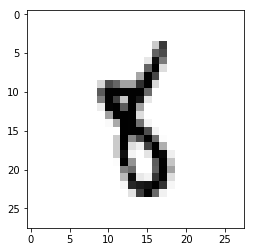

In [12]:
pred_random = 5678
plt.imshow(x_test[pred_random].reshape(28,28),cmap = 'Greys')
pred = model.predict(x_test[pred_random].reshape(1,28,28,1))
print(pred.argmax())


#### So as you can see that from test data we took a random number and evaluate with our tarined model and model is predicting perfect.